In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Hypothesis to test - can I use GPT to estimate nutrients intake without any additional information apart from the name? This would substanially simplify the app.

In [3]:
df = pd.read_csv("../data/processed/scraped_data_with_gpt_estimated_contents.csv")

In [4]:
## Correct errors found during analysis
df.loc[df['LLM friendly name'] == "Potato", 'energy_kcal_100g'] = 74
df.loc[df['LLM friendly name'] == "Potato", 'fat_100g'] = 0.2
df.loc[df['LLM friendly name'] == "Potato", 'carbohydrates_100g'] = 15.7
df.loc[df['LLM friendly name'] == "Potato", 'proteins_100g'] = 2.1


df.loc[df['LLM friendly name'] == "Bacon", 'energy_kcal_100g'] = 347
df.loc[df['LLM friendly name'] == "Bacon", 'fat_100g'] = 30
df.loc[df['LLM friendly name'] == "Bacon", 'carbohydrates_100g'] = 1
df.loc[df['LLM friendly name'] == "Bacon", 'proteins_100g'] = 18


df.loc[df['LLM friendly name'] == "Limonata (San Pellegrino)", 'energy_kcal_100g'] = 24
df.loc[df['LLM friendly name'] == "Limonata (San Pellegrino)", 'fat_100g'] = 0
df.loc[df['LLM friendly name'] == "Limonata (San Pellegrino)", 'carbohydrates_100g'] = 7.7
df.loc[df['LLM friendly name'] == "Limonata (San Pellegrino)", 'proteins_100g'] = 0.1


df.loc[df['LLM friendly name'] == "Whole milk", 'energy_kcal_100g'] = 65
df.loc[df['LLM friendly name'] == "Whole milk", 'fat_100g'] = 3.9
df.loc[df['LLM friendly name'] == "Whole milk", 'carbohydrates_100g'] = 4.3
df.loc[df['LLM friendly name'] == "Whole milk", 'proteins_100g'] = 3.3

In [5]:
# Add comparison columns

df["proteins_error"] = (df['proteins_100g'] - df['gpt_proteins_100g'])
df["carbohydrates_error"] = (df['carbohydrates_100g'] - df['gpt_carbohydrates_100g'])
df["fat_error"] = (df['fat_100g'] - df['gpt_fat_100g'])
df["energy_error"] = (df['energy_kcal_100g'] - df['gpt_energy_kcal_100g'])

df["proteins_abs_error"] = np.abs(df['proteins_100g'] - df['gpt_proteins_100g'])
df["carbohydrates_abs_error"] = np.abs(df['carbohydrates_100g'] - df['gpt_carbohydrates_100g'])
df["fat_abs_error"] = np.abs(df['fat_100g'] - df['gpt_fat_100g'])
df["energy_abs_error"] = np.abs(df['energy_kcal_100g'] - df['gpt_energy_kcal_100g'])

In [6]:
def calculate_percentage_error(actual, estimated):
    # skip cases when both are smaller than 2 not to explode it
    if actual < 2 and estimated < 2:
        return np.nan
    return np.abs((actual - estimated) / actual * 100)

df["proteins_%error"] = df.apply(lambda row: calculate_percentage_error(row['proteins_100g'], row['gpt_proteins_100g']), axis=1)
df["carbohydrates_%error"] = df.apply(lambda row: calculate_percentage_error(row['carbohydrates_100g'], row['gpt_carbohydrates_100g']), axis=1)
df["fat_%error"] = df.apply(lambda row: calculate_percentage_error(row['fat_100g'], row['gpt_fat_100g']), axis=1)
df["energy_%error"] = df.apply(lambda row: calculate_percentage_error(row['energy_kcal_100g'], row['gpt_energy_kcal_100g']), axis=1)

proteins_error difference


count    81.000000
mean     -0.075086
std       4.222156
min     -14.000000
25%      -1.050000
50%       0.000000
75%       1.200000
max      25.000000
Name: proteins_error, dtype: float64

carbohydrates_error difference


count    81.000000
mean      0.330198
std      12.646287
min     -24.000000
25%      -4.000000
50%      -1.100000
75%       0.420000
max      58.000000
Name: carbohydrates_error, dtype: float64

fat_error difference


count    81.000000
mean     -0.882499
std       4.541244
min     -15.000000
25%      -3.000000
50%      -0.010000
75%       0.400000
max      15.800000
Name: fat_error, dtype: float64

energy_error difference


count     80.000000
mean       1.906250
std       60.791533
min     -128.000000
25%      -24.000000
50%       -1.000000
75%       10.500000
max      201.000000
Name: energy_error, dtype: float64

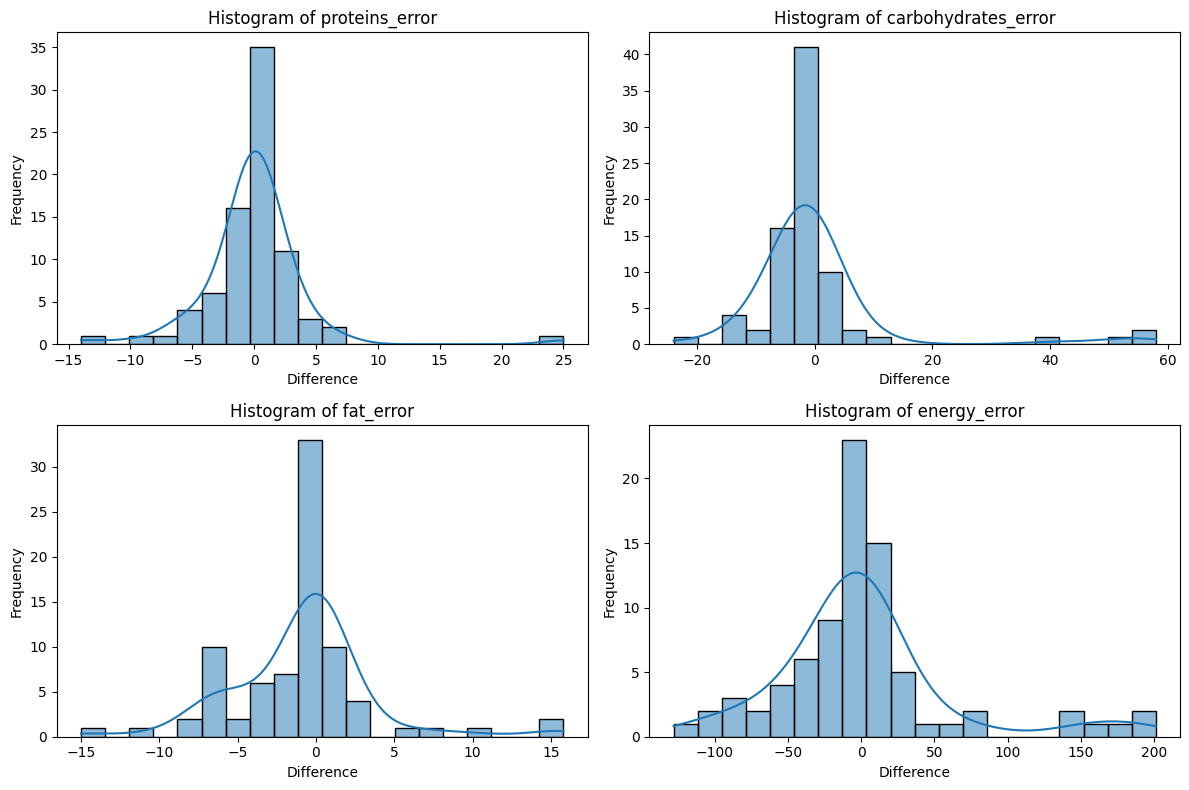

In [9]:
error_columns = [
    "proteins_error", "carbohydrates_error", "fat_error", "energy_error"
]

# matplotlib subplot with historgrams of difference
plt.figure(figsize=(12, 8))
for i, col in enumerate(error_columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot((df[col]), bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel('Difference')
    plt.ylabel('Frequency')
    
    print(col, "difference")
    display((df[col]).describe())
plt.tight_layout()
plt.show()


proteins_%error percentage difference


count     67.000000
mean      26.673716
std       24.967153
min        0.000000
25%        7.609594
50%       18.750000
75%       33.333333
max      100.000000
Name: proteins_%error, dtype: float64

carbohydrates_%error percentage difference


count     74.000000
mean      44.830346
std       68.468521
min        0.000000
25%        8.063584
50%       27.661886
75%       52.003817
max      400.000000
Name: carbohydrates_%error, dtype: float64

fat_%error percentage difference


count     59.000000
mean      80.482811
std      127.084767
min        0.000000
25%        8.225352
50%       38.461538
75%       88.636364
max      627.272727
Name: fat_%error, dtype: float64

energy_%error percentage difference


count     80.000000
mean      21.077015
std       25.548641
min        0.000000
25%        3.935096
50%        9.336947
75%       32.829543
max      134.375000
Name: energy_%error, dtype: float64

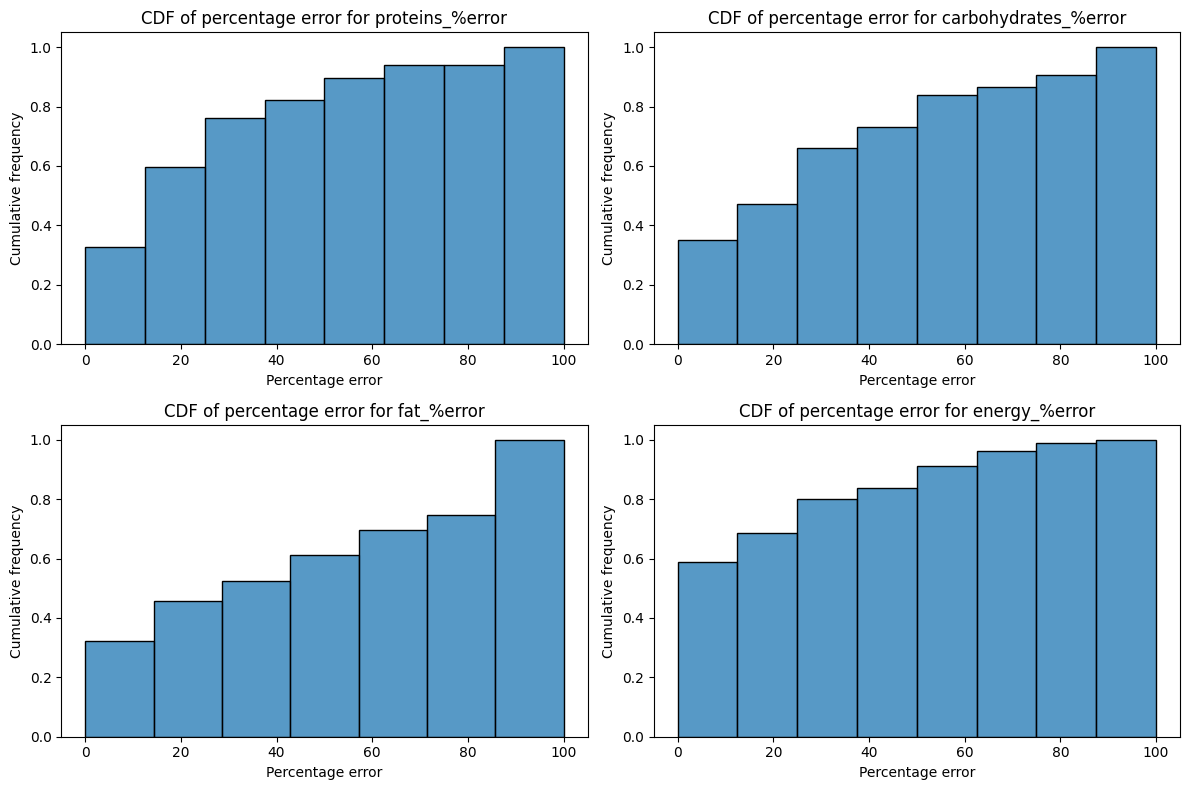

In [17]:
# matplotlib subplot with CDF of difference but percentage, hard cap at 100%

error_columns_percentage = [
    "proteins_%error", "carbohydrates_%error", "fat_%error", "energy_%error"
]

plt.figure(figsize=(12, 8))
for i, col in enumerate(error_columns_percentage):
    plt.subplot(2, 2, i + 1)
    sns.histplot((df[col].dropna().clip(0, 100)), cumulative=True, stat='density')
    plt.title(f'CDF of percentage error for {col}')
    plt.xlabel('Percentage error')
    plt.ylabel('Cumulative frequency')
    
    print(col, "percentage difference")
    display((df[col].dropna()).describe())
plt.tight_layout()
plt.show()

,proteins_%error,carbohydrates_%error,fat_%error,energy_%error
category,,,,
Basic Processed Foods,14.132104,33.333333,70.588235,10.638298
Beverages,NaN,24.313187,NaN,26.315789
Composite Dishes,17.127072,23.191824,107.300084,14.035088
Highly Processed Foods,29.912281,34.440952,38.461538,10.302198
Minimally Processed Foods,11.242604,45.614035,8.000000,6.648352
Moderately Processed Foods,27.272727,7.142857,50.000000,3.304816
Raw Ingredients,4.761905,33.333333,1.061739,4.054054
Specialty Foods,30.769231,20.512821,37.614679,16.500164


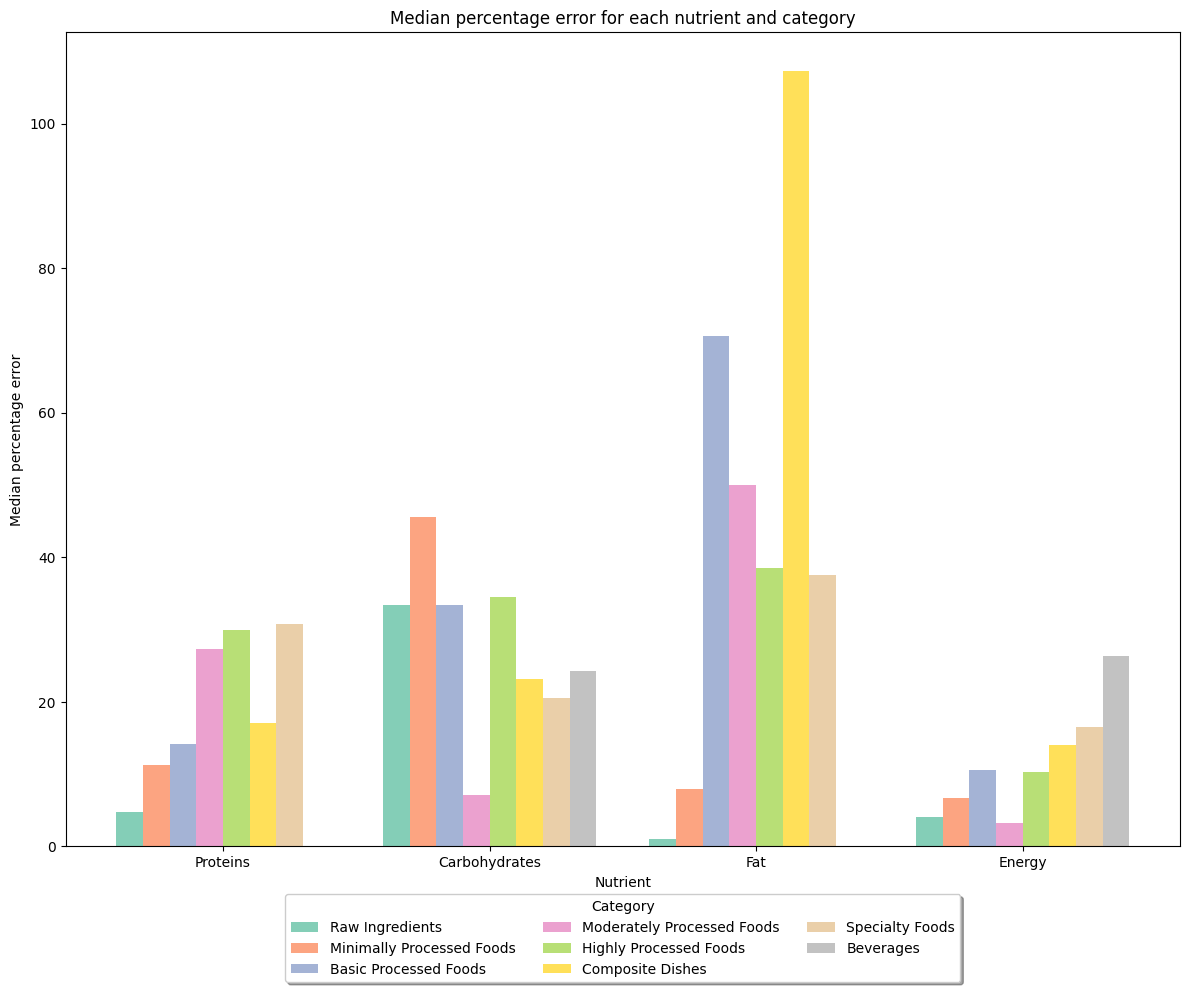

In [41]:
median_percentage_error = df.groupby("category")[["proteins_%error", "carbohydrates_%error", "fat_%error", "energy_%error"]].median()
display(median_percentage_error)

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 10))  # Adjusted figure size for better proportions

nutrients = ["proteins_%error", "carbohydrates_%error", "fat_%error", "energy_%error"]
nutrient_labels = ["Proteins", "Carbohydrates", "Fat", "Energy"]

# Specify the desired order of categories
category_order = ["Raw Ingredients", "Minimally Processed Foods", "Basic Processed Foods", "Moderately Processed Foods", "Highly Processed Foods", "Composite Dishes", "Specialty Foods", "Beverages"]

# Filter and sort the DataFrame based on the specified order
median_percentage_error_sorted = median_percentage_error.loc[median_percentage_error.index.intersection(category_order)].reindex(category_order)

categories = median_percentage_error_sorted.index
colors = plt.cm.Set2(np.linspace(0, 1, len(categories)))  # Use a colormap for distinct colors

x = np.arange(len(nutrients))
width = 0.8 / len(categories)

for i, (category, color) in enumerate(zip(categories, colors)):
    plt.bar(x + i*width, median_percentage_error_sorted.loc[category, nutrients], 
            width, color=color, label=category, alpha=0.8)

plt.xlabel('Nutrient')
plt.ylabel('Median percentage error')
plt.title('Median percentage error for each nutrient and category')
plt.xticks(x + width * (len(categories) - 1) / 2, nutrient_labels)
plt.legend(title='Category', loc='upper center', bbox_to_anchor=(0.5, -0.05), 
           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

## Long term intake simulation

In [79]:
def simulate_daily_random_intake(df, calories_goal: int = 2000):
    kcal_intake = 0
    proteins_intake = 0
    carbohydrates_intake = 0
    fat_intake = 0
    
    kcal_intake_gpt = 0
    proteins_intake_gpt = 0
    carbohydrates_intake_gpt = 0
    fat_intake_gpt = 0
    while kcal_intake < calories_goal:
        food = df.sample().iloc[0]
        if np.isnan(food["energy_kcal_100g"]) or np.isnan(food["proteins_100g"]) or np.isnan(food["carbohydrates_100g"]) or np.isnan(food["fat_100g"]):
            continue
        kcal_intake += food["energy_kcal_100g"]
        kcal_intake_gpt += food["gpt_energy_kcal_100g"]
        proteins_intake += food["proteins_100g"]
        proteins_intake_gpt += food["gpt_proteins_100g"]
        carbohydrates_intake += food["carbohydrates_100g"]
        carbohydrates_intake_gpt += food["gpt_carbohydrates_100g"]
        fat_intake += food["fat_100g"]
        fat_intake_gpt += food["gpt_fat_100g"]
        
    return pd.DataFrame({"actual_kcal": [kcal_intake], "actual_proteins": [proteins_intake], "actual_carbohydrates": [carbohydrates_intake], "actual_fat": [fat_intake], "gpt_kcal": [kcal_intake_gpt], "gpt_proteins": [proteins_intake_gpt], "gpt_carbohydrates": [carbohydrates_intake_gpt], "gpt_fat": [fat_intake_gpt]})

def simulate_daily_random_intake_for_n_days(df, n: int = 100):
    simulation_results =[]
    for i in range(n):
        daily_intake = simulate_daily_random_intake(df)
        daily_intake['day'] = i + 1
        simulation_results.append(daily_intake)
    return pd.concat(simulation_results)

In [80]:
simulation_results = simulate_daily_random_intake_for_n_days(df, n=100)

In [93]:
simulation_results["actual_kcal_cumsum"] = simulation_results["actual_kcal"].cumsum()
simulation_results["gpt_kcal_cumsum"] = simulation_results["gpt_kcal"].cumsum()
simulation_results["actual_proteins_cumsum"] = simulation_results["actual_proteins"].cumsum()
simulation_results["gpt_proteins_cumsum"] = simulation_results["gpt_proteins"].cumsum()
simulation_results["actual_carbohydrates_cumsum"] = simulation_results["actual_carbohydrates"].cumsum()
simulation_results["gpt_carbohydrates_cumsum"] = simulation_results["gpt_carbohydrates"].cumsum()
simulation_results["actual_fat_cumsum"] = simulation_results["actual_fat"].cumsum()
simulation_results["gpt_fat_cumsum"] = simulation_results["gpt_fat"].cumsum()


In [96]:
simulation_results["kcal_cumulated_percent_error"] = simulation_results.apply(lambda row: calculate_percentage_error(row["actual_kcal_cumsum"], row["gpt_kcal_cumsum"]), axis=1)   
simulation_results["proteins_cumulated_percent_error"] = simulation_results.apply(lambda row: calculate_percentage_error(row["actual_proteins_cumsum"], row["gpt_proteins_cumsum"]), axis=1)
simulation_results["carbohydrates_cumulated_percent_error"] = simulation_results.apply(lambda row: calculate_percentage_error(row["actual_carbohydrates_cumsum"], row["gpt_carbohydrates_cumsum"]), axis=1)
simulation_results["fat_cumulated_percent_error"] = simulation_results.apply(lambda row: calculate_percentage_error(row["actual_fat_cumsum"], row["gpt_fat_cumsum"]), axis=1)


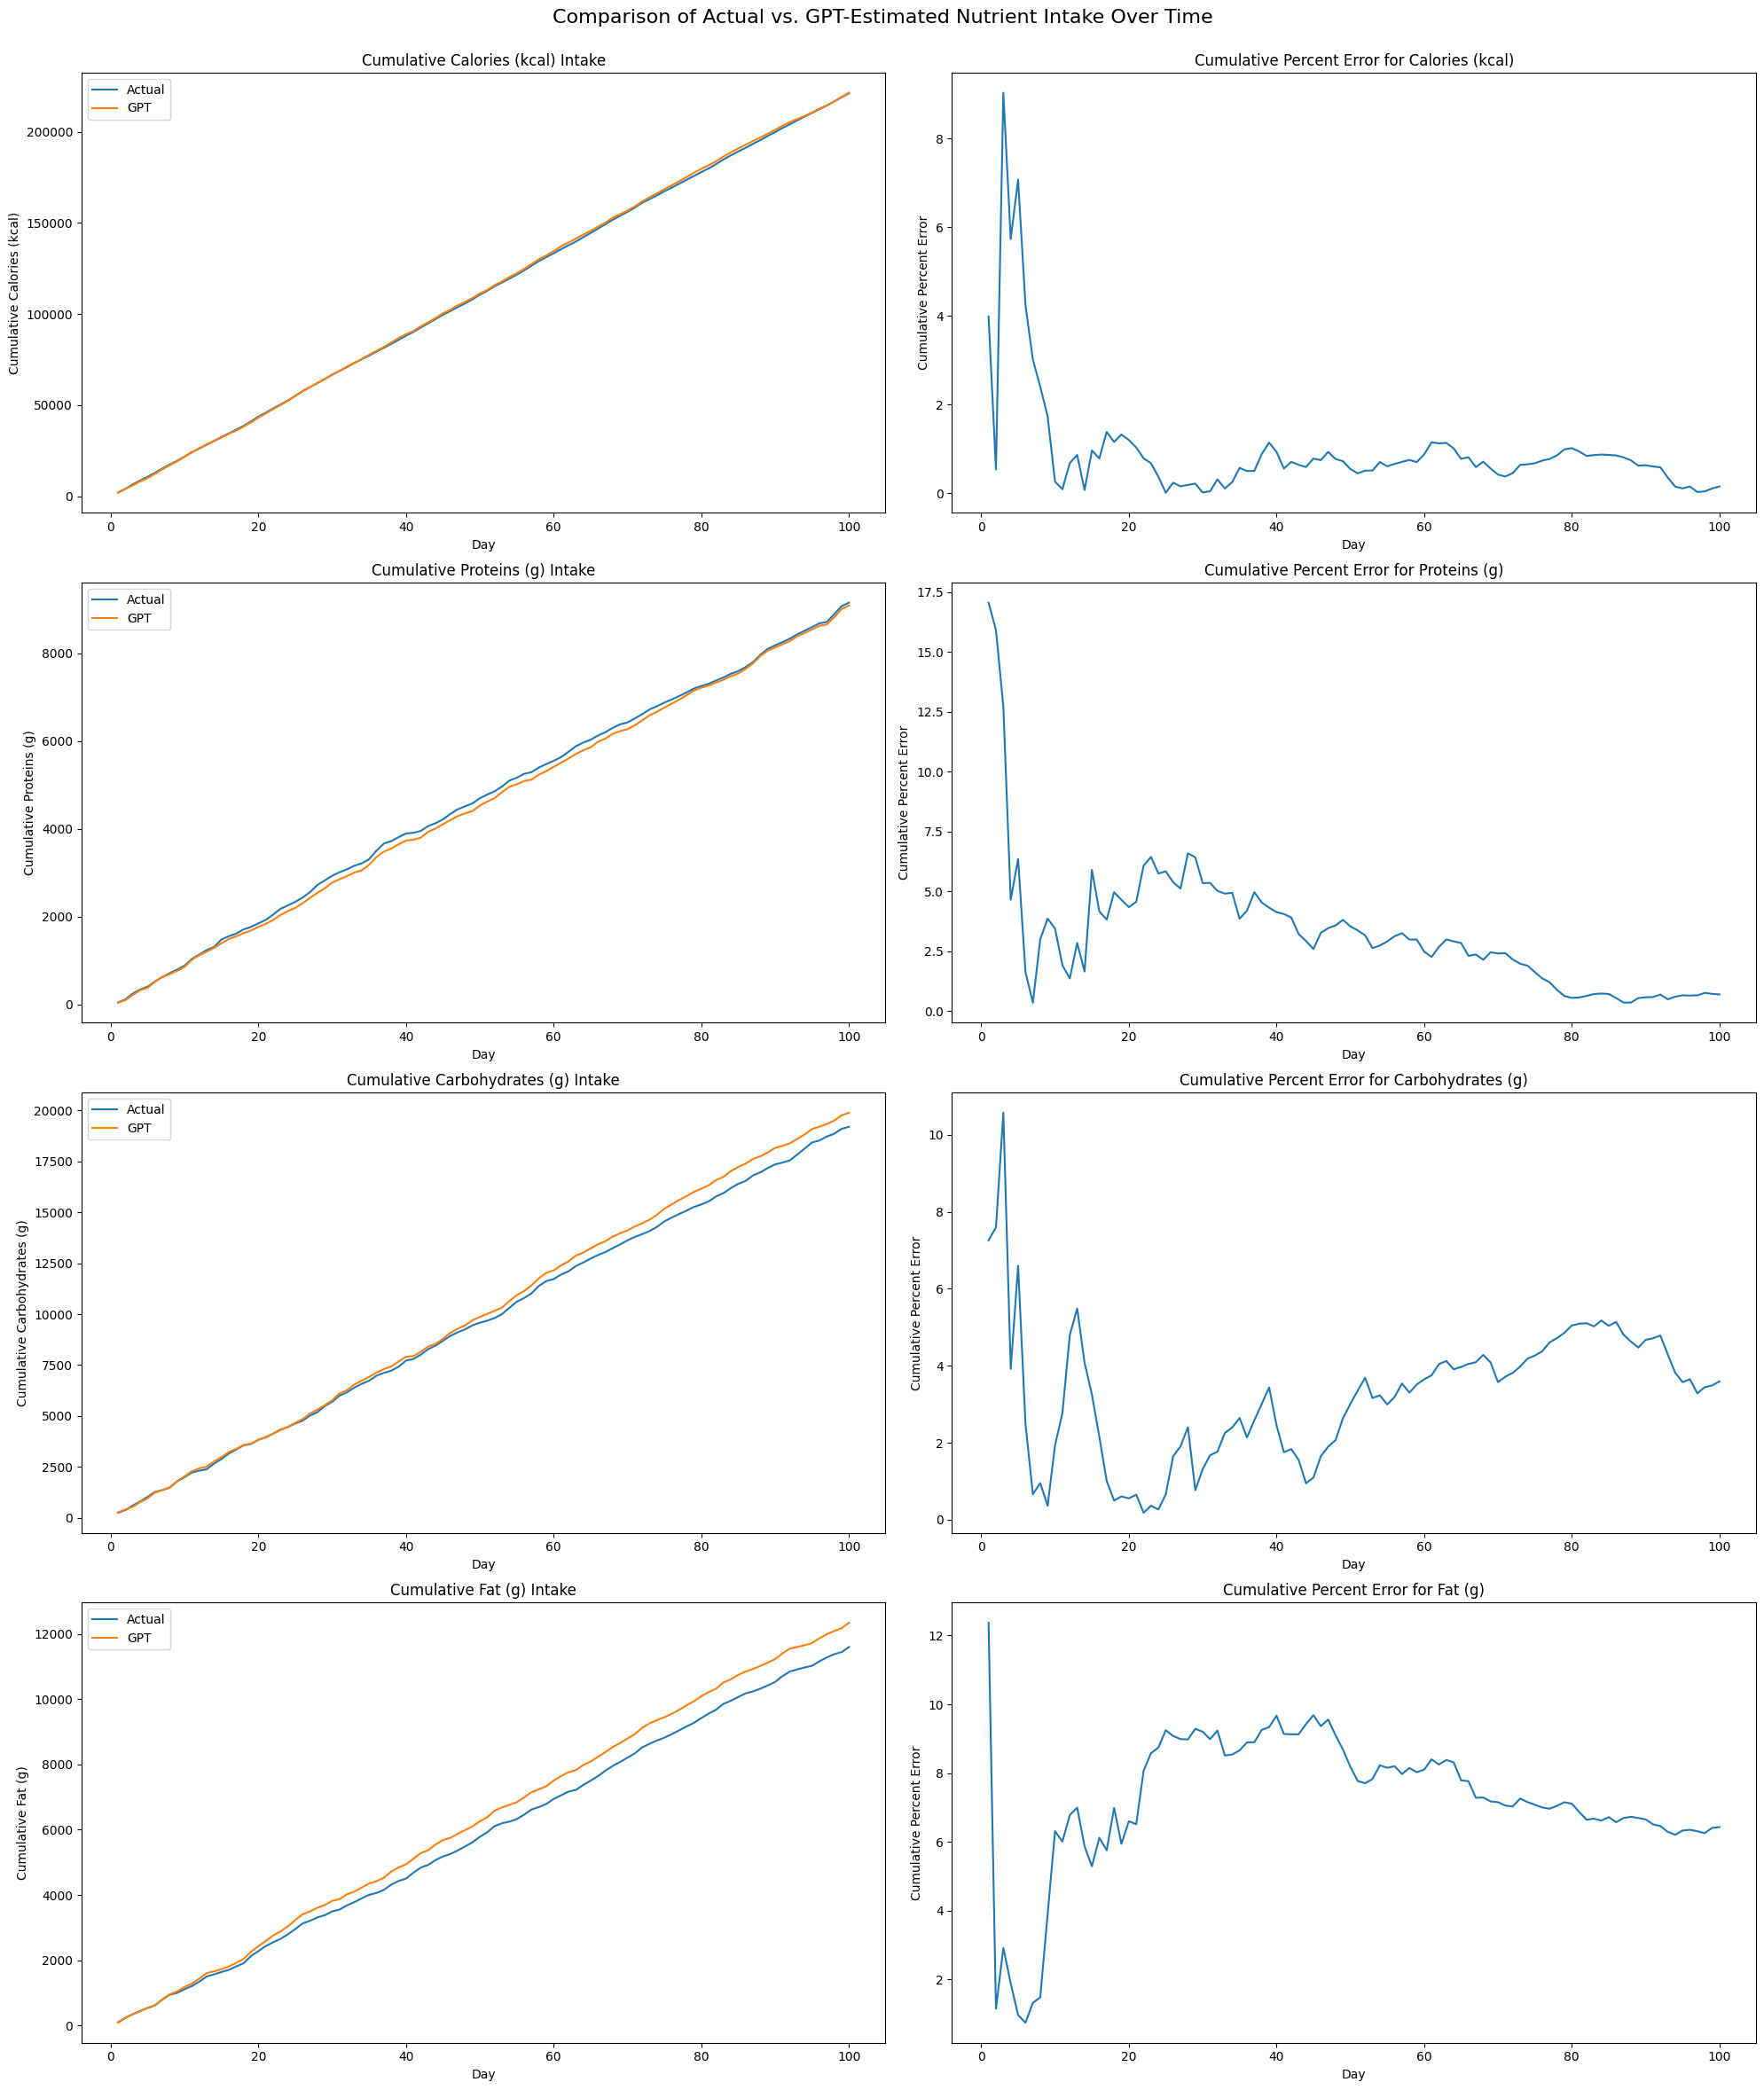

In [108]:
# Plot cumulative nutrients intake in left column and their errors in right column
plt.figure(figsize=(20, 24))

nutrients = [
    ("kcal", "Calories (kcal)"),
    ("proteins", "Proteins (g)"),
    ("carbohydrates", "Carbohydrates (g)"),
    ("fat", "Fat (g)")
]

for i, (nutrient, label) in enumerate(nutrients):
    # Cumulative intake plot
    plt.subplot(4, 2, 2*i + 1)
    plt.plot(simulation_results["day"], simulation_results[f"actual_{nutrient}_cumsum"], label="Actual")
    plt.plot(simulation_results["day"], simulation_results[f"gpt_{nutrient}_cumsum"], label="GPT")
    plt.xlabel("Day")
    plt.ylabel(f"Cumulative {label}")
    plt.title(f"Cumulative {label} Intake")
    plt.legend()

    # Error plot
    plt.subplot(4, 2, 2*i + 2)
    plt.plot(simulation_results["day"], simulation_results[f"{nutrient}_cumulated_percent_error"])
    plt.xlabel("Day")
    plt.ylabel("Cumulative Percent Error")
    plt.title(f"Cumulative Percent Error for {label}")

plt.suptitle("Comparison of Actual vs. GPT-Estimated Nutrient Intake Over Time", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# Long term intake simulation - diet heavy on Barilla Spaghetti (outlier product)

In [117]:
def simulate_daily_random_intake_heavy_on_barilla_spaghetti(df, calories_goal: int = 2000, barilla_probability: float = 0.2):
    kcal_intake = 0
    proteins_intake = 0
    carbohydrates_intake = 0
    fat_intake = 0
    
    kcal_intake_gpt = 0
    proteins_intake_gpt = 0
    carbohydrates_intake_gpt = 0
    fat_intake_gpt = 0
    while kcal_intake < calories_goal:
        if np.random.random() < barilla_probability:
            food = df.loc[df['LLM friendly name'] == "Spaghetti (Barilla)"].iloc[0]
        else:
            food = df.sample().iloc[0]
        if np.isnan(food["energy_kcal_100g"]) or np.isnan(food["proteins_100g"]) or np.isnan(food["carbohydrates_100g"]) or np.isnan(food["fat_100g"]):
            continue
        kcal_intake += food["energy_kcal_100g"]
        kcal_intake_gpt += food["gpt_energy_kcal_100g"]
        proteins_intake += food["proteins_100g"]
        proteins_intake_gpt += food["gpt_proteins_100g"]
        carbohydrates_intake += food["carbohydrates_100g"]
        carbohydrates_intake_gpt += food["gpt_carbohydrates_100g"]
        fat_intake += food["fat_100g"]
        fat_intake_gpt += food["gpt_fat_100g"]
        
    return pd.DataFrame({"actual_kcal": [kcal_intake], "actual_proteins": [proteins_intake], "actual_carbohydrates": [carbohydrates_intake], "actual_fat": [fat_intake], "gpt_kcal": [kcal_intake_gpt], "gpt_proteins": [proteins_intake_gpt], "gpt_carbohydrates": [carbohydrates_intake_gpt], "gpt_fat": [fat_intake_gpt]})

def simulate_daily_random_intake_for_n_days_heavy_on_barilla_spaghetti(df, n: int = 100):
    simulation_results =[]
    for i in range(n):
        daily_intake = simulate_daily_random_intake_heavy_on_barilla_spaghetti(df)
        daily_intake['day'] = i + 1
        simulation_results.append(daily_intake)
    return pd.concat(simulation_results)

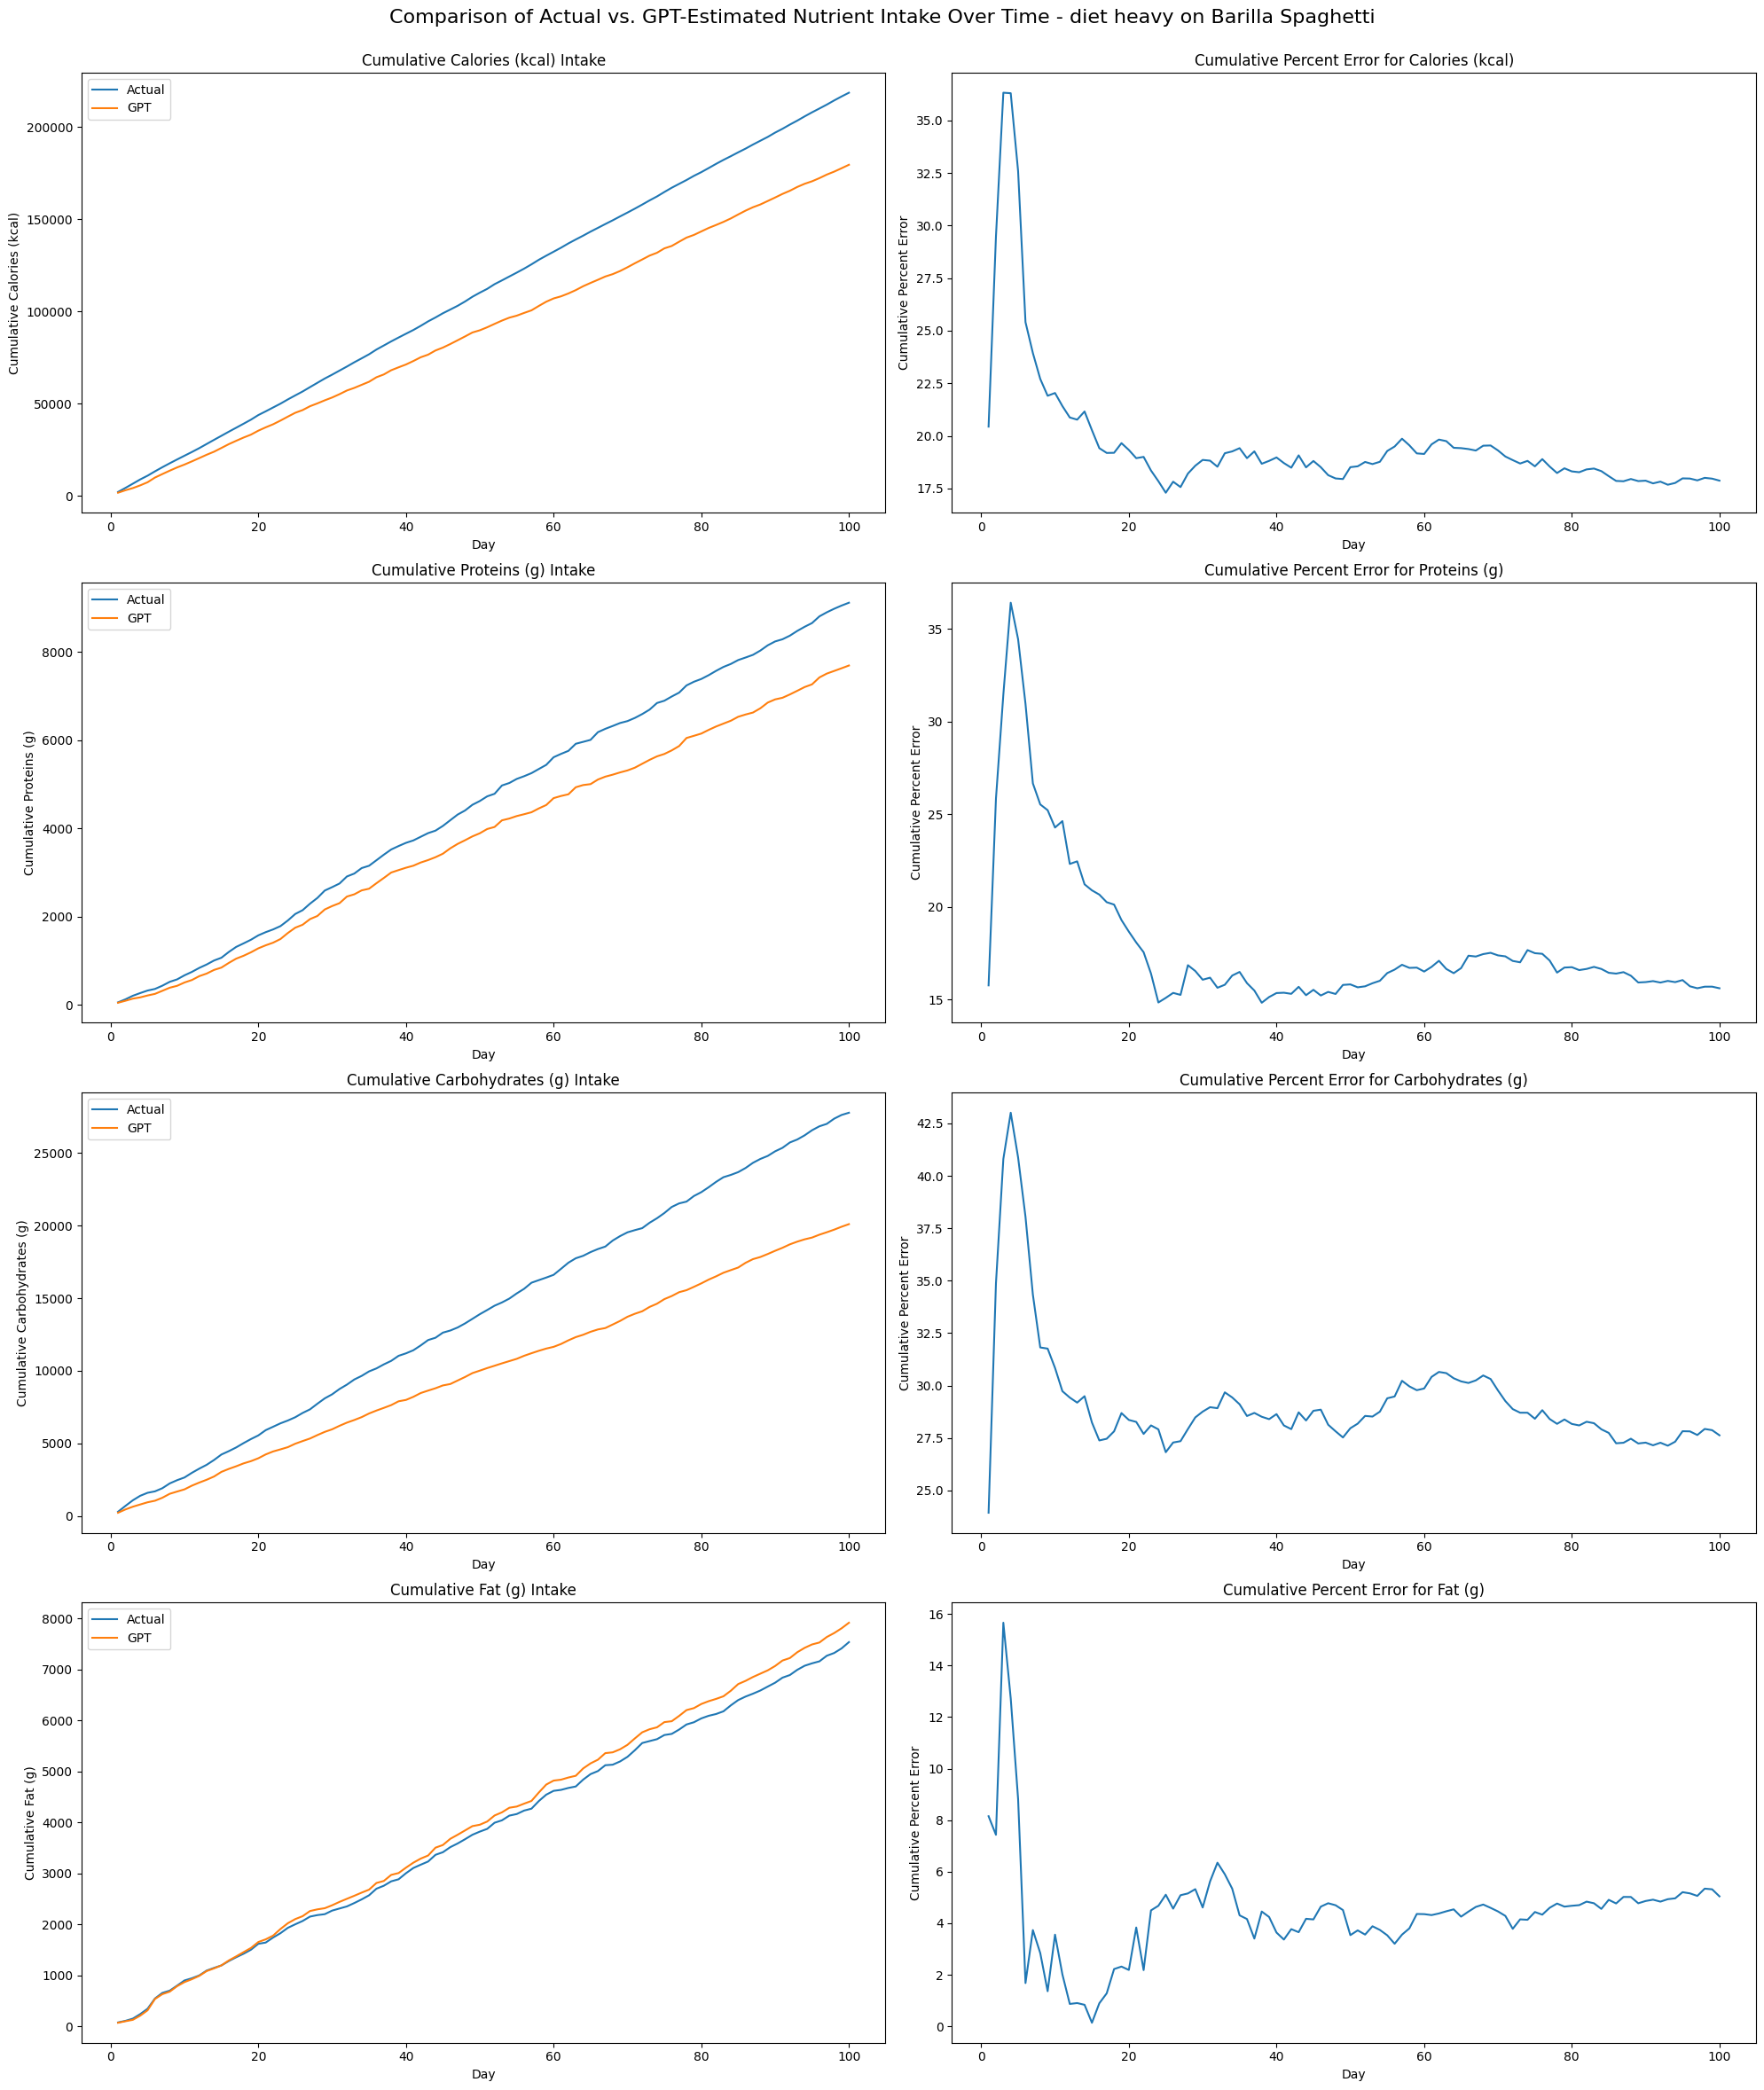

In [118]:
simulation_results_heavy_on_barilla_spaghetti = simulate_daily_random_intake_for_n_days_heavy_on_barilla_spaghetti(df, n=100)
simulation_results_heavy_on_barilla_spaghetti["actual_kcal_cumsum"] = simulation_results_heavy_on_barilla_spaghetti["actual_kcal"].cumsum()
simulation_results_heavy_on_barilla_spaghetti["gpt_kcal_cumsum"] = simulation_results_heavy_on_barilla_spaghetti["gpt_kcal"].cumsum()
simulation_results_heavy_on_barilla_spaghetti["actual_proteins_cumsum"] = simulation_results_heavy_on_barilla_spaghetti["actual_proteins"].cumsum()
simulation_results_heavy_on_barilla_spaghetti["gpt_proteins_cumsum"] = simulation_results_heavy_on_barilla_spaghetti["gpt_proteins"].cumsum()
simulation_results_heavy_on_barilla_spaghetti["actual_carbohydrates_cumsum"] = simulation_results_heavy_on_barilla_spaghetti["actual_carbohydrates"].cumsum()
simulation_results_heavy_on_barilla_spaghetti["gpt_carbohydrates_cumsum"] = simulation_results_heavy_on_barilla_spaghetti["gpt_carbohydrates"].cumsum()
simulation_results_heavy_on_barilla_spaghetti["actual_fat_cumsum"] = simulation_results_heavy_on_barilla_spaghetti["actual_fat"].cumsum()
simulation_results_heavy_on_barilla_spaghetti["gpt_fat_cumsum"] = simulation_results_heavy_on_barilla_spaghetti["gpt_fat"].cumsum()
simulation_results_heavy_on_barilla_spaghetti["kcal_cumulated_percent_error"] = simulation_results_heavy_on_barilla_spaghetti.apply(lambda row: calculate_percentage_error(row["actual_kcal_cumsum"], row["gpt_kcal_cumsum"]), axis=1)   
simulation_results_heavy_on_barilla_spaghetti["proteins_cumulated_percent_error"] = simulation_results_heavy_on_barilla_spaghetti.apply(lambda row: calculate_percentage_error(row["actual_proteins_cumsum"], row["gpt_proteins_cumsum"]), axis=1)
simulation_results_heavy_on_barilla_spaghetti["carbohydrates_cumulated_percent_error"] = simulation_results_heavy_on_barilla_spaghetti.apply(lambda row: calculate_percentage_error(row["actual_carbohydrates_cumsum"], row["gpt_carbohydrates_cumsum"]), axis=1)
simulation_results_heavy_on_barilla_spaghetti["fat_cumulated_percent_error"] = simulation_results_heavy_on_barilla_spaghetti.apply(lambda row: calculate_percentage_error(row["actual_fat_cumsum"], row["gpt_fat_cumsum"]), axis=1)
# Plot cumulative nutrients intake in left column and their errors in right column
# Plot cumulative nutrients intake in left column and their errors in right column
plt.figure(figsize=(20, 24))

nutrients = [
    ("kcal", "Calories (kcal)"),
    ("proteins", "Proteins (g)"),
    ("carbohydrates", "Carbohydrates (g)"),
    ("fat", "Fat (g)")
]

for i, (nutrient, label) in enumerate(nutrients):
    # Cumulative intake plot
    plt.subplot(4, 2, 2*i + 1)
    plt.plot(simulation_results_heavy_on_barilla_spaghetti["day"], simulation_results_heavy_on_barilla_spaghetti[f"actual_{nutrient}_cumsum"], label="Actual")
    plt.plot(simulation_results_heavy_on_barilla_spaghetti["day"], simulation_results_heavy_on_barilla_spaghetti[f"gpt_{nutrient}_cumsum"], label="GPT")
    plt.xlabel("Day")
    plt.ylabel(f"Cumulative {label}")
    plt.title(f"Cumulative {label} Intake")
    plt.legend()

    # Error plot
    plt.subplot(4, 2, 2*i + 2)
    plt.plot(simulation_results_heavy_on_barilla_spaghetti["day"], simulation_results_heavy_on_barilla_spaghetti[f"{nutrient}_cumulated_percent_error"])
    plt.xlabel("Day")
    plt.ylabel("Cumulative Percent Error")
    plt.title(f"Cumulative Percent Error for {label}")

plt.suptitle("Comparison of Actual vs. GPT-Estimated Nutrient Intake Over Time - diet heavy on Barilla Spaghetti", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# TL;DR findings

-> OpenFoodFacts is not a 100% reliable source of data itself, as there were some errors in nutrient informations

-> GPT estimations are less precise as I thought. While most of the products are estimated wuith an acceptable error, there are outliers that were a total miss. And it happens also for products that are pretty straightforward - for example actual energy content of Barilla Spaghetti pasta is double of what GPT estimates.

-> On the bright side, for calories and proteins there does not seem to be a systematic error in estimations - meaning that in the long run, the errors will probably cancel each other out and provide an accrate estimation of intake.

-> However this cannot be said about carbohydrates and fats. While the error does not seem like it's significant on the granularity of single product, simulation of 100 days of intake prove that after such time, fat intake would be overestimated by over 6%, while carbs intake would be overestimated by almost 4%.

-> Overall the model deals pretty well with kcals and proteins, does worse job on carbs and makes biggest mistakes for fats.

-> When it comes to the complexity of the product, the errors of proteins and kcal behave as expected - they are the lowest for simpler products, and increase along with the dish complexity. However, for fats and carbs, there does not seem to be correlation between meal complexity and error magnitude.

-> If we get unlucky and heavily base our diet on a product that has wrong estimates, the calculations will not be trustworthy at all - simulation of using barilla spaghetti in every fifth meal shows that calories after 100 days will be underestimatesd by 18%, whereas fats by almost 30% (!!!)

Results: GPT estimation is not reliable enough to trust it unconditionally with calculating nutrients intake. While esimations for energy and proteins prove themselves unbiased and somewhat reliable, fats and carbs yield an error of about 5-6% percent in the long run. Moreover, there is a substantial risk of the impact of including outliers in the diet. If one is a huge fan of Barilla spaghetti and eats it every second day for dinner, calculations would not be trustworthy at all.